* [`torchvision`] (https://pytorch.org/vision/stable/index.html) - for torvhvision

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.0.1
0.15.2a0


'cuda'

In [3]:
#1 getting a datset from torchvision.datasets
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='dataset', #where to download
    train=True, #want the trainign set
    download=True, #want to downlaod the dataset
    transform=ToTensor(), #or torchvision.transforms.ToTensor
    target_transform=None #how do we want to transform the labels/targets

)

test_data = datasets.FashionMNIST(
    root='dataset',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
#tsee the first training exaple
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"Image shape: {image.shape} -> [colorclhannel, heigh , width]")
print(f"the class of the label: {class_names[label]}")
# image.shape, label

Image shape: torch.Size([1, 28, 28]) -> [colorclhannel, heigh , width]
the class of the label: Ankle boot


In [10]:
#visualizing our images 
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")

Image shape: torch.Size([1, 28, 28])


In [11]:
# plt.imshow(image)      #color channels first doesnt work 

Text(0.5, 1.0, 'Ankle boot')

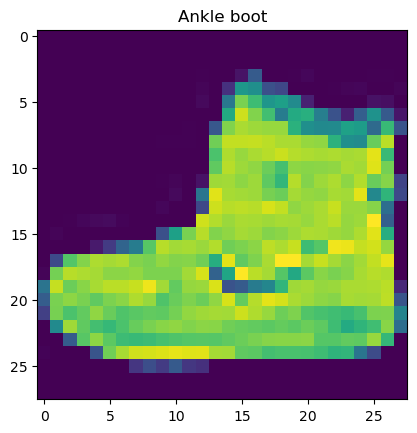

In [12]:
#therefore
plt.imshow(image.squeeze())#so we squeeze teh color channel out 
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

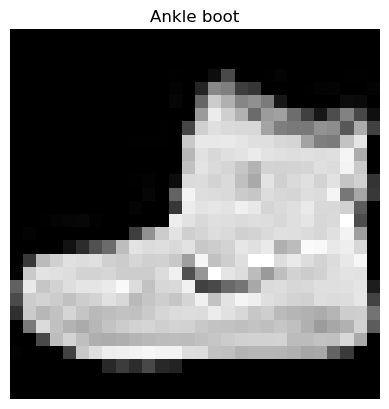

In [13]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

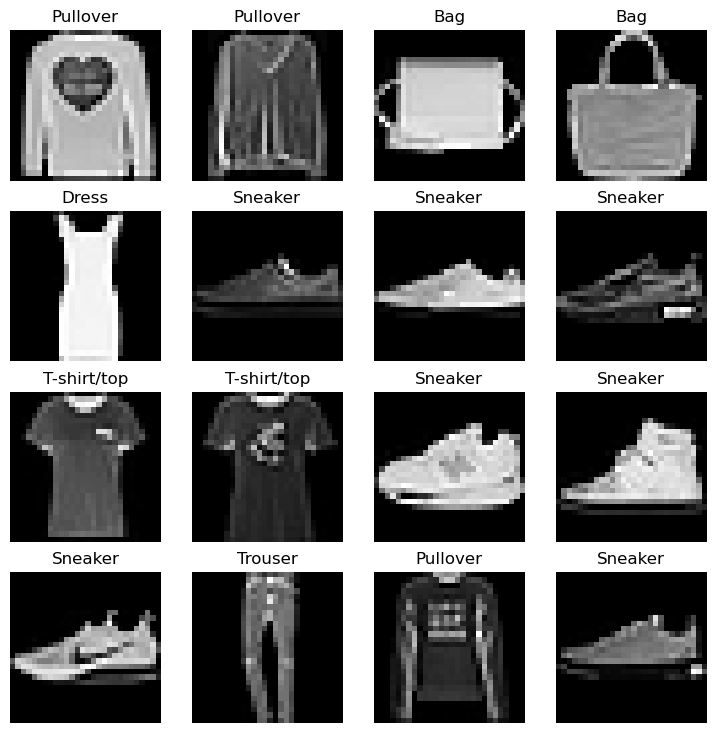

In [14]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [15]:
# do you think these items of clothing (iages) could be modelled with pure linear lines or do you thik we'll need non -linearities

#prepare dataloaders
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [16]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [17]:
#dataloader trns our dataset into a python iterable more specifically
#we want to turn our data into batches or (mini-batches)

#it is computationally efficient as in your computer hardware may not be able to look
#store in memory at 60,000 iamges in one hit . so we break it ddown to 32 (batchsize)(recommended by yan lecun) at a time 
#gives our nn more changes to updpate its gradients per epoch 

In [18]:
from torch.utils.data import DataLoader 
#setup the bactch size hyperparaketer
BATCH_SIZE = 32

#turn datasetsinto iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) #order of test_data doesnt matter

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd020377490>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd0204d7890>)

In [19]:
#lets check ou what we've created 
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lenght of the train_dataloader: {len(train_dataloader)} batches of  {BATCH_SIZE}")
print(f"Length of test_dataloaders: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fd020377490>, <torch.utils.data.dataloader.DataLoader object at 0x7fd0204d7890>)
Lenght of the train_dataloader: 1875 batches of  32
Length of test_dataloaders: 313 batches of 32


In [20]:
60000/32, 10000/32

(1875.0, 312.5)

In [21]:
#check whats insdide th training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch)
train_features_batch.shape, train_labels_batch.shape


tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

10
Image size: torch.Size([1, 28, 28])
Label: 8, label_size: torch.Size([])


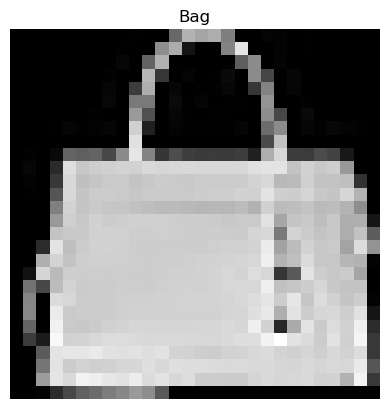

In [22]:
#show a smaple 
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(random_idx) #is always less than 32!
print(f"Image size: {img.shape}")
print(f"Label: {label}, label_size: {label.shape}")

In [23]:
#building a model
#when starting to buid a series of machine learning modeeling experiment 
#its best to star titha  baseline model
# a baseline mode lis a simple omdel you willl try and improve upon with subsequent models/experiments


In [24]:
#create a flatten layer
flatten_model = nn.Flatten() #flattens multi dim tensors to be able to tuse in sequential (makes it 1d)
#get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [25]:
#flatten the sample
output = flatten_model(x) #perform forward pass on mflatten layer
print(f"shape before flattenning: {x.shape}-> [color chan, heigh, weight]")
print(f"Shape after flattening: {output.shape}-> [colorchan, height*width]")
print(f"28*28={28*28} making it a single vector input ")

shape before flattenning: torch.Size([1, 28, 28])-> [color chan, heigh, weight]
Shape after flattening: torch.Size([1, 784])-> [colorchan, height*width]
28*28=784 making it a single vector input 


In [26]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3569, 0.6784, 0.5216, 0.4863, 0.5059, 0.5412, 0.5333, 0.5333, 0.7176,
         0.7804, 0.3529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.7804, 0.9216, 0.9137, 1.0000, 0.9647, 0.8980, 1.0000, 0.9137,
         0.8980, 0.9216, 0.7020, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.6549, 0.8706, 0.8588, 0.8314, 0.6392, 0.5216, 0.7529,
         0.8588, 0.8588, 0.8941, 0.4039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.7569, 0.8706, 0.8549, 0.8863, 0.8980, 0.8667,
         0.9020, 0.8706, 0.8588, 0.8941, 0.3765, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [27]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [28]:
torch.manual_seed(42)
#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, #784
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [29]:
#dummy forward pass
dummy_x = torch.rand(size=(1,1,28,28))
model_0(dummy_x) #output of logits
model_0(dummy_x).shape

torch.Size([1, 10])

In [30]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [31]:
### setup loss, optimzer and evaluation metrics
#loss = since we multiclss cassi we using nn.crossentroyloss()
#optimzer we gonna continue with torch.optim.SGD()
#eval metric = we use acc metric since its a classification problem

In [32]:
from pathlib import Path
import requests
#downlaod helper_functions
if Path('helper_functions.py').is_file():
    print("file exists skipping download")
else:
    print("downloading helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

from helper_functions import accuracy_fn

file exists skipping download


## OR

In [33]:
from torchmetrics import Accuracy

## OR


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
#setup loss fn and optim
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [36]:
### create ea fuction to time our experiments

#machine learning is every experimental

#two of the main things you'll often want to tracka re:
#1. model's performacnec (los and acc values)
#2. how fast it runs (lets test gpu vs cpu)

In [37]:
from timeit import default_timer as timer #python default timer
def print_train_time(start: float,
                     end:float,
                     device: torch.device = None):
    """
    prints diffrentce between start and end time
    """
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [38]:
start_time = timer()
#... some code...
end_time = timer()
print_train_time(start = start_time, end=end_time, device='cpu')


Train time on cpu: 0.000 seconds


3.364200165378861e-05

In [39]:
#optimzer will update a model's params once per batch intead of once per epoch 
#craeatng a trainign anadd testin gloop

#loop through epochs.
#loop htorugh training batches, performs training steps, calculate the train loss per batch

#loop thorugh testing batches perform testing steps, calc th etes tposs per batch
#. printou t whats happeinign 
#5. time it all for fun

In [40]:
from tqdm.auto import tqdm

#set the seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#start timer 
train_time_start_on_cpu = timer()
#set the no of epochs
epochs = 3

#create  loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    #train
    train_loss=0
#adding loop to loop thoruhg the training batches
    for batch, (X, y) in enumerate(train_dataloader): #X->image, y->label
        model_0.train()
        #forward pass
        y_pred = model_0(X)

        #calc the loss
        loss = loss_fn(y_pred,y)
        train_loss+=loss # loss per batch

        #optimier zero grad
        optimizer.zero_grad()

        #loss backward
        loss.backward()

        #optimzer step
        optimizer.step()

        #print out whats happened
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    #divice total train loss bylength of train dataloader
    train_loss /= len(train_dataloader)
    
    ### testing loop
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #forward pass
            test_pred = model_0(X_test)
            
            #calc the loss 
            test_loss += loss_fn(test_pred,y_test)
            #calc the acc
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # we have to use argmax to get the index of the logit  wit the highest value
            #ie logits-> labels

        #calc the eest loss avg per batch
        test_loss /= len(test_dataloader)

        #calc the test acc
        test_acc /= len(test_dataloader)
    #print out whts happening
    print(f"\nTrain loss: {train_loss:.4f} | Test_loss {test_loss:.4f} | test_acc: {test_acc:.4f}")

#clac the training time 
train_time_end_on_cpu = timer()
total_train_time_mode_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


/usr/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:11<00:23, 11.80s/it]


Train loss: 0.5904 | Test_loss 0.5095 | test_acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:22<00:10, 10.95s/it]


Train loss: 0.4763 | Test_loss 0.4799 | test_acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:32<00:00, 10.71s/it]


Train loss: 0.4550 | Test_loss 0.4766 | test_acc: 83.4265
Train time on cpu: 32.142 seconds


In [41]:
str(next(model_0.parameters()).device)

'cpu'

In [42]:
# import torch.utils.data.Dataloader

ModuleNotFoundError: No module named 'torch.utils.data.Dataloader'

In [43]:
#make predictions and get model_0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    returns a dictionary containing the reuilts of model predictiong on data_loader...
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #make preds
            y_pred = model(X)

            #accumulate los and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y,y_pred.argmax(dim=1))

        #scale the lss and acc to find avg loss.acc per batch
        loss /= len(data_loader)
        print(loss)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "mode_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 218.00it/s]

tensor(0.4766)


{'model_name': 'FashionMNISTModelV0',
 'mode_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [44]:
#5 imporve thorugh experimentation!! can we go above 83??
#setup device agnostic code to use GPU 

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
#trying to better make the model have non linearity
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #flatten input sintoa  1d vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
                      )
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    

In [62]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [64]:
dummy_x= dummy_x.to(device)
model_1(dummy_x)

tensor([[0.0806, 0.1593, 0.1565, 0.0000, 0.4741, 0.1441, 0.1634, 0.3834, 0.0000,
         0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)

In [51]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [65]:
loss_fn = nn.CrossEntropyLoss(),
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [69]:
##create functions for traiing and evaluatipn testing loops

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    """
    performs a trainnig with model trying to learn on data_loader
    """
    train_loss, train_acc = 0, 0
    model.train()

        #train
#adding loop to loop thoruhg the training batches
    for batch, (X, y) in enumerate(data_loader): #X->image, y->label
        #put data on traget device
        X, y = X.to(device), y.to(device)
        #forward pass
        y_pred = model(X)

        #calc the loss
        loss = loss_fn(y_pred,y)
        train_loss+=loss # loss per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) #logits -> pred labels
        #optimier zero grad
        optimizer.zero_grad()

        #loss backward
        loss.backward()

        #optimzer step
        optimizer.step()

        #print out whats happened
        # if batch % 400 == 0:
        #     print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    #divice total train loss and acc bylength of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"train loss: {train_loss:.5f} | Train_acc: {train_acc:.2f}%")

In [70]:
#test step fn
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0,0
    #Put the modelin eval mode
    model.eval()

    #turn on tinere mode context manager
    with torch.inference_mode():
        for X,y in data_loader:
            X, y = X.to(device), y.to(device)

            #1.fowrad pass
            test_pred = model(X)

            #2.c acl the oloss/accc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))
        #adjust metrics and print out 
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(F"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")


In [68]:
torch.manual_seed(42)

#meature time
from timeit import default_timer as timer 
train_time_start_on_gpu = timer()

#set epochs
epochs = 3

#creat a optimizeaiton and evaluation loop using tarian_step() and test_step()

for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}\n--------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
--------


TypeError: 'tuple' object is not callable

In [ ]:

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'mode_loss': 0.46264058351516724,
 'model_acc': 83.98562300319489}

In [ ]:
total_train_time_mode_0

33.60315745299886